# Áp dụng K-Means vào bài toán phân khúc khách hàng

Nguồn: https://archive.ics.uci.edu/ml/datasets/wholesale+customers

Phân khúc khách hàng của một nhà phân phối bán buôn dựa trên chi tiêu hàng năm của họ cho các danh mục sản phẩm đa dạng: sữa, hàng tạp hóa, khu vực,...

### Tìm hiểu dữ liệu

In [2]:
import pandas as pd

#load dữ liệu
data= pd.read_csv("E:/Wholesale customers data.csv")
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


Mỗi hàng đc mô tả bởi 8 đặc trưng gồm: Channel, Region, Milk, Grocery, Detergents_Paper, Delicassen.

In [3]:
data.shape

(440, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Tập dữ liệu bao gồm 2 cột về channel và region và 6 danh mục sản phẩm: 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper' và 'Delicatessen'. Không có giá trị nào NULL. Định dạng đều là numerical.

In [5]:
# thống kê
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
#data.median()

### Tiền xử lý dữ liệu

Các biến như Channel và Region có độ lớn thấp trong khi các biến như Fresh, Milk, Grocery, v.v. có độ lớn cao hơn. Các cột Channel, Region không cung cấp thông tin về chi tiêu, không phù hợp với mục tiêu bài toán đặt ra => Xóa. 

In [7]:
#Drop các cột Channel và Region
df = data.drop(['Region', 'Channel'], axis = 1)
df.shape

(440, 6)

Vì K-Means là một thuật toán dựa trên khoảng cách, phạm vi dữ liêu biến thiên, sự khác biệt về độ lớn giưa các biến có thể gây ảnh hưởng đến kết quả phân cụm. => đưa tất cả các biến về cùng độ lớn (magnitude) bằng cách scale dữ liệu (data scaling)

In [9]:
# standardizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#fit vào dữ liệu và transform
df_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
pd.DataFrame(df_scaled)

,0,1,2,3,4,5
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...
435,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


### Giảm chiều dữ liệu (PCA)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_reduced = pca.fit_transform(df_scaled)
print(df_reduced)

[[ 2.04458516e-02 -4.12432441e-03]
 [ 4.50032876e-02 -3.68885887e-02]
 [ 4.04741364e-02 -1.37459744e-02]
 [-9.22945828e-02  2.87862771e-02]
 [-2.05136946e-02  1.06330131e-01]
 [-1.73601626e-02 -2.63839647e-02]
 [-2.02663728e-02 -2.75686539e-02]
 [ 1.34428642e-02 -4.19964429e-02]
 [-4.33457440e-02 -6.89173239e-02]
 [ 1.77908992e-01 -5.74558336e-02]
 [ 7.91302688e-02 -6.76192459e-02]
 [-9.09981700e-02 -1.08074382e-02]
 [ 8.30153765e-02  1.52954330e-01]
 [ 1.04032659e-01  5.58561642e-02]
 [ 8.45682206e-02  8.44283320e-02]
 [-8.82149773e-02 -4.14339105e-02]
 [ 7.37814710e-02 -1.03489144e-01]
 [-6.19167026e-02 -3.94995869e-02]
 [ 1.70659505e-02  5.42715317e-02]
 [-1.87851469e-02 -5.99249508e-02]
 [-3.85352174e-02  3.12438135e-02]
 [-1.10248319e-01 -5.60456803e-02]
 [-5.56739412e-02  1.94613953e-01]
 [ 3.37764332e-01  2.62949774e-01]
 [ 9.38395372e-02  1.04904285e-01]
 [ 2.74289960e-03 -6.31904112e-04]
 [-1.06667964e-01 -2.24006406e-02]
 [-1.09334014e-01 -7.45248078e-03]
 [ 3.08939116e-01 -3

In [12]:
df_reduced.shape

(440, 2)

In [13]:
ps = pd.DataFrame(df_reduced)
ps.head()

,0,1
0,0.020446,-0.004124
1,0.045003,-0.036889
2,0.040474,-0.013746
3,-0.092295,0.028786
4,-0.020514,0.106330


### Triển khai K-Means

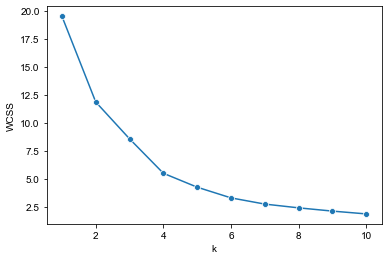

In [14]:
#chọn số cụm k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

WCSS = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_reduced)
    WCSS.append(kmeans.inertia_)

# trực quan kết quả lên đồ thị
import seaborn as sns
sns.lineplot(x=range(1,11), y=WCSS, marker='o')
sns.set(rc = {'figure.figsize':(10,6)})
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

k = [2, 3, 4]
print("Áp dụng phương pháp Silhouette:\n")
for n_clusters in k:
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(df_reduced) 
    silhouette_avg = silhouette_score(df_reduced, cluster_labels)
    print("k =", n_clusters, 
          "=> Silhouette_score:", silhouette_avg) 

Áp dụng phương pháp Silhouette:

k = 2 => Silhouette_score: 0.6206142183312632
k = 3 => Silhouette_score: 0.46474022170625345
k = 4 => Silhouette_score: 0.5105764845411437


In [16]:
#K Means Clustering
#tạo kmeans model với 2 cụm
kmean = KMeans(n_clusters=2, random_state=0).fit(df_reduced)
pred = kmean.predict(df_reduced)
labels = kmean.labels_

"""plt.figure(figsize=(8,6))
plt.title("K-Means Clustering ",fontsize=20)
plt.scatter(ps[0], ps[1],c = pred, s=80, 
            cmap='brg',alpha=0.6,marker='o')
plt.show()
"""

'plt.figure(figsize=(8,6))\nplt.title("K-Means Clustering ",fontsize=20)\nplt.scatter(ps[0], ps[1],c = pred, s=80, \n            cmap=\'brg\',alpha=0.6,marker=\'o\')\nplt.show()\n'

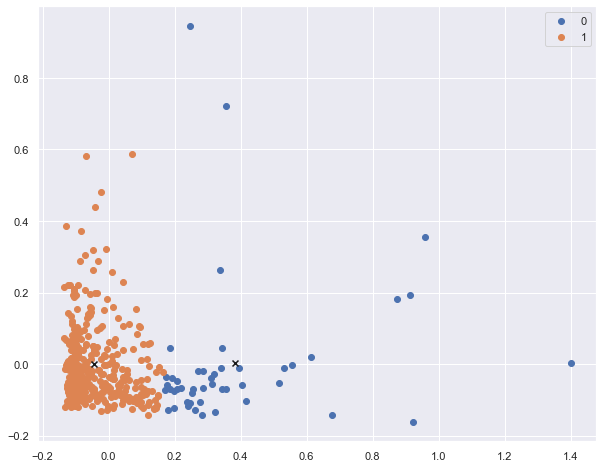

In [17]:
#plot kmeans clusters
import numpy as np
import matplotlib.pyplot as plt
centers = np.array(kmean.cluster_centers_)
label = kmean.fit_predict(df_reduced)
plt.figure(figsize=(10,8))
# Component 1 
#pca_1 = df_reduced[:, 0]
# Component 2
#pca_2 = df_reduced[:, 1]
uniq = np.unique(label)
for i in uniq:
    plt.scatter(df_reduced[label == i , 0] , df_reduced[label == i , 1] ,label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

plt.legend()
plt.show()

### Quan sát và phân tích kết quả

#### Đánh giá từ kết quả phân cụm

In [18]:
#đếm số phần tử trong từng cụm
frame = pd.DataFrame(df_reduced)
frame['cluster'] = labels
frame['cluster'].value_counts()


1    393
0     47
Name: cluster, dtype: int64

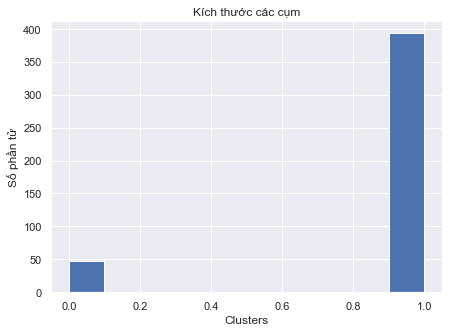

In [19]:
#plot cluster size
plt.figure(figsize=(7,5))
plt.hist(labels)
plt.title("Kích thước các cụm")
plt.xlabel("Clusters")
plt.ylabel("Số phần tử")
plt.show()

Kích thước cụm 0 là 47 đối tượng và cụm 1 là 393 đối tượng quan sát

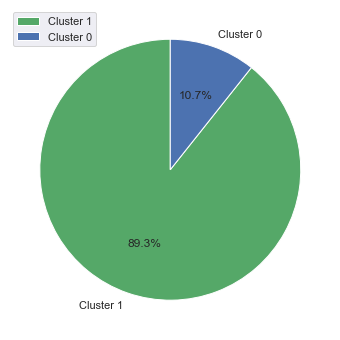

In [20]:
sizes = frame['cluster'].value_counts()/440 * 100
label = ['Cluster 1','Cluster 0']

plt.figure(figsize = (6,6))
plt.pie(sizes, labels = label, colors=['g', 'b'], startangle=90, autopct='%1.1f%%', shadow = False) 
plt.legend()
plt.show()

In [22]:
pca.components_

array([[-0.018545  ,  0.49047312,  0.57644674, -0.01741587,  0.647882  ,
         0.08213992],
       [ 0.86387717,  0.18182434, -0.00363933,  0.39690977, -0.12652721,
         0.21701704]])

số dòng = số component, số cột = số features gốc. Chuyển thành dataframe:

In [24]:
#tương quan giữa các thành phần với các feature gốc
pca_comp = pd.DataFrame(data=pca.components_, columns=df.columns)
pca_comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.018545,0.490473,0.576447,-0.017416,0.647882,0.082140
1,0.863877,0.181824,-0.003639,0.396910,-0.126527,0.217017


<AxesSubplot:title={'center':'Tuong quan giua cac thanh phan voi cac feature ban dau'}, ylabel='Trọng số'>

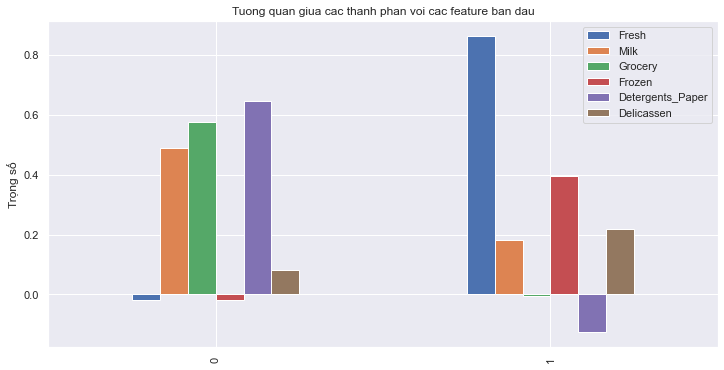

In [25]:
pca_comp.plot.bar(figsize=(12,6), ylabel = "Trọng số", title = ("Tuong quan giua cac thanh phan voi cac feature ban dau"))

Trọng số dương cao => Tác động tích cực đến xu hướng mua hàng của KH:
- Comp 1: Detergents_Paper có trọng số cao nhất, theo sau là Grocery và Milk (tương quan thuận) => Nếu mua D và G thì sẽ mua sữa nhưng sẽ ko mua FF vì trọng số âm
- Comp 2: Fresh có trọng số cao nhất, tiếp đến là Frozen và Deli => Nếu mua Deli thì sẽ mua cả F F, ko mua D

Đặc biệt, Fresh, Delicatessen, Frozen có trọng số dương cao. Vì vậy 3 mặt hàng này có tác động tích cực đến xu hướng mua hàng của khách hàng.

Ma trận tương quan giữa các sản phẩm


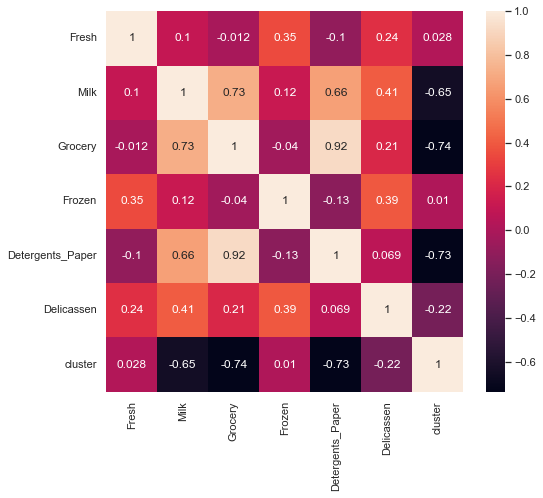

In [39]:
print('Ma trận tương quan giữa các sản phẩm')
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [27]:
# Inverse transform
scale_centers = pca.inverse_transform(centers) #nghịch đảo pca
true_centers = scaler.inverse_transform(scale_centers) #nghịch đảo scale

# Hiển thị các trọng tâm (tb) của 2 cụm 0,1
clusters = ['Cluster {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = df.keys())
true_centers.index = clusters
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster 0,11371.0,19576.0,28375.0,2708.0,12974.0,3046.0
Cluster 1,12076.0,4148.0,5509.0,3115.0,1675.0,1343.0


In [28]:
#Plot tb
"""plt.figure(figsize = (10,6))
plt.axes().set_title("Cluster 0")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values)

plt.figure()
plt.axes().set_title("Cluster 1")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values)
"""

'plt.figure(figsize = (10,6))\nplt.axes().set_title("Cluster 0")\nsns.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values)\n\nplt.figure()\nplt.axes().set_title("Cluster 1")\nsns.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values)\n'

In [29]:
df.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

Text(0.5, 1.0, 'Lượng mua trung bình của các sản phẩm đối với từng cluster')

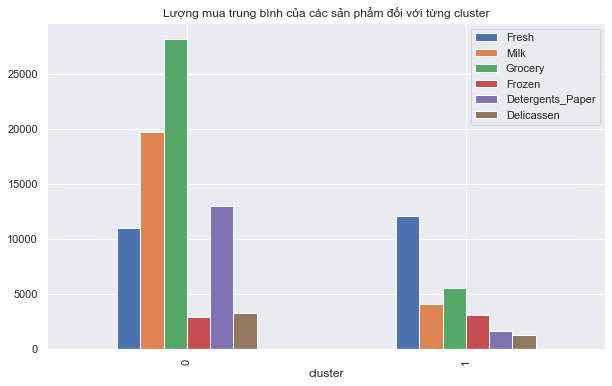

In [30]:
#plot tb
Kmeans=KMeans(n_clusters=2,init='k-means++',n_init=10,random_state=0)
df['cluster']=kmean.fit_predict(df_reduced)
df.groupby('cluster').agg('mean').plot.bar(figsize=(10,6))
plt.title("Lượng mua trung bình của các sản phẩm đối với từng cluster")

### Nhận xét
- Cluster 1: Lượng tiêu dùng Sữa (mean 5796.2), Đồ tạp hóa (mean 7951.2), chất tẩy rửa (mean 2881.4) cao => Đây là các nhà phân phối số lượng lớn như các đại lý lớn hoặc siêu thị.
- Cluster 0: Lượng tiêu dùng đồ tươi sống cao hơn tất cả các sản phẩm khác, theo sau là đồ đông lạnh => Đây là nhà hàng ăn

In [31]:
#df_pred = df.reset_index()
#df_pred['pred'] = labels

df['cluster']

0      1
1      1
2      1
3      1
4      1
      ..
435    1
436    1
437    0
438    1
439    1
Name: cluster, Length: 440, dtype: int32

In [32]:
df['cluster'].iloc[437]

0

In [33]:
i = int(input("Nhập giá trị quan sát cần biết cụm: \n"))
print("Giá trị",i,"thuộc cụm ",df['cluster'].iloc[i])

Nhập giá trị quan sát cần biết cụm: 
88
Giá trị 88 thuộc cụm  1


Text(0.5, 1.0, 'Phân bố khách hàng từ các KV')

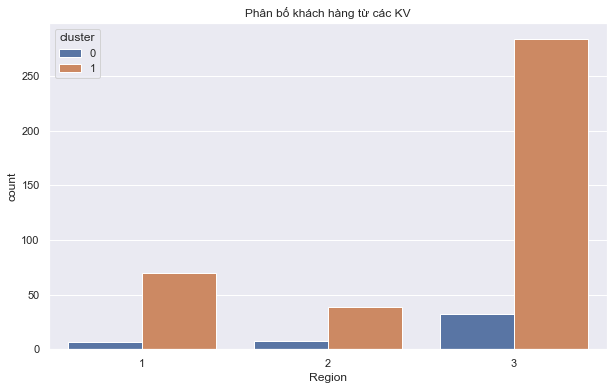

In [34]:
# Phân bố khu vực và kênh khashc hàng cho các cụm
data['cluster']=kmean.fit_predict(df_reduced)
sns.countplot(x='Region', data=data, hue = 'cluster') #cho KV
plt.title('Phân bố khách hàng từ các KV')

Text(0.5, 1.0, 'Phân bố khashc hàng từ các kênh')

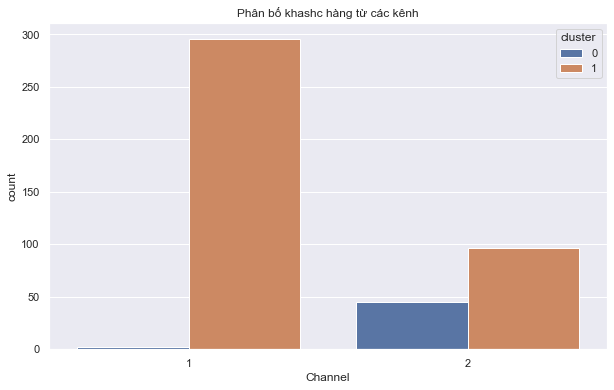

In [35]:
sns.countplot(x='Channel', data=data, hue = 'cluster') #cho Kênh KH
plt.title('Phân bố khashc hàng từ các kênh')

#### Đánh giá chung

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_4144/2276648893.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataCR=data.groupby(['Channel','Region'])['Fresh', 'Milk', 'Grocery','Frozen',


Text(0.5, 1.0, 'Chi tiêu của Channel vs Region')

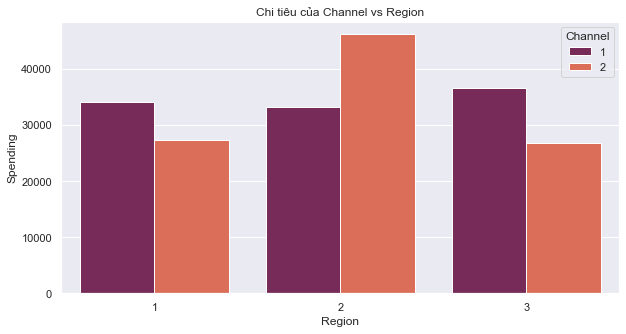

In [36]:
#Channel và Region nào tiêu thụ nhiều hơn
dataCR=data.groupby(['Channel','Region'])['Fresh', 'Milk', 'Grocery','Frozen',
                                     'Detergents_Paper', 'Delicassen'].sum()
dataCR=dataCR.reset_index()
dataCR['Spending']=data['Fresh']+ data['Milk']+ data['Grocery']+data['Frozen']+data['Detergents_Paper']+data['Delicassen']
plt.figure(figsize=(10,5))
sns.barplot(data=dataCR,x='Region',y='Spending',hue='Channel',palette='rocket')
plt.title('Chi tiêu của Channel vs Region')

In [38]:
regiondf = dataCR.groupby('Region')['Spending'].sum()
print(regiondf)
print()
channeldf = dataCR.groupby('Channel')['Spending'].sum()
print(channeldf)

Region
1    61493
2    79366
3    63320
Name: Spending, dtype: int64

Channel
1    103988
2    100191
Name: Spending, dtype: int64


Region 2 chi tiêu cao nhất, Region 1 chi tiêu ít nhất.
2 channel chi tiêu xấp xỉ nhau nhưng Channel 1 nhỉnh hơn 1 chút


Hệ số tương quan cao => Thường đc mua cùng nhau:
- Milk + Grocery (0.73)
- Milk + Detergents_Paper (0.66)
- Grocery + Detergents_Paper (0.92)

Sự thay đổi ảnh hưởng đến hành vi của KH trong các pk khác nhau.

Trong pk 1, Nếu mua Deli thì sẽ mua cả Fresh và Frozen, ko mua Detergents. nhưng ở phân khúc 0, Nếu mua Detergent và Grocery thì sẽ mua sữa nhưng sẽ ko mua FF

Phân tích đã gom cụm wholesale customers dựa trên chi tiêu hàng năm cho các sản phẩm thành 2 cụm. Phân tích mang lại lợi ích cho cả nhà phân phối và khách hàng:

Đối với npp: tối đa hóa hiệu quả phân phối thông qua việc giảm lượng hàng tồn kho, lập kế hoạch phân loại và cải thiện không gian lưu trữ hàng hóa.
Đối với khách hàng mua buôn: tăng doanh thu của họ bằng cách cung cấp các combo và chiết khấu phù hợp dựa trên sở thích mua hàng cụ thể của họ và giảm chi phí lưu kho.